# Aprendizaje automático relacional

In [18]:
# Configurando las variables de entorno
%env NX_CUGRAPH_AUTOCONFIG=True

env: NX_CUGRAPH_AUTOCONFIG=True


In [19]:
# Librerias

import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
# import cugraph as cg # networkx on gpu

https://www.kaggle.com/datasets/rozemberczki/musae-github-social-network/data

In [4]:
# Datos
edges = pd.read_csv("../data/musae_git_edges.csv")
features = pd.read_csv("../data/musae_git_features.csv")
target = pd.read_csv("../data/musae_git_target.csv")

In [5]:
edges.head()

,id_1,id_2
0,0,23977
1,1,34526
2,1,2370
3,1,14683
4,1,29982


In [6]:
features.head()

,node,feature
0,0,1574
1,0,3773
2,0,3571
3,0,2672
4,0,2478


In [7]:
target.head()

,id,name,ml_target
0,0,Eiryyy,0
1,1,shawflying,0
2,2,JpMCarrilho,1
3,3,SuhwanCha,0
4,4,sunilangadi2,1


## EDA

### Construcción del grafo

In [8]:
G = nx.from_pandas_edgelist(edges,'id_1','id_2')

In [9]:
# Se necesita una forma más eficiente de hacer la representación
# plt.figure(figsize=(40,40))
# nx.draw(G,alpha=0.5,node_color=target["ml_target"])

### Métricas del grafo

Distribución de grados (normalizada dividiendo por n-1)

            degrees
count  37700.000000
mean       0.000407
std        0.002143
min        0.000027
25%        0.000053
50%        0.000159
75%        0.000345
max        0.250882


<Axes: ylabel='Count'>

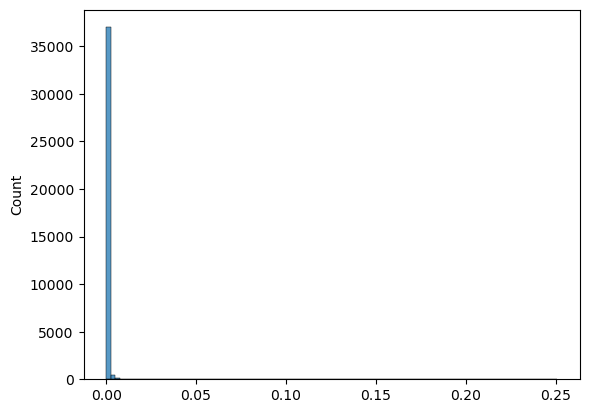

In [10]:
degrees = nx.degree_centrality(G)
print(pd.DataFrame.from_dict(degrees,orient="index",columns=["degrees"]).describe())
sns.histplot(degrees,bins=100)

Distribución de clustering

         clustering
count  37700.000000
mean       0.167537
std        0.225168
min        0.000000
25%        0.000000
50%        0.100000
75%        0.226316
max        1.000000


<Axes: ylabel='Count'>

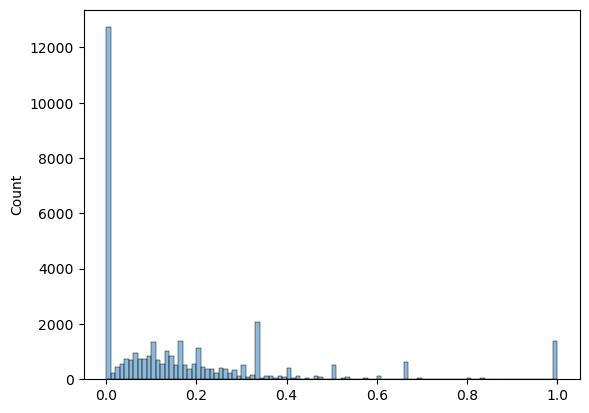

In [11]:
clustering = nx.clustering(G)
print(pd.DataFrame.from_dict(clustering,orient="index",columns=["clustering"]).describe())
sns.histplot(clustering.values(),bins=100,legend=False)

Clustering medio

In [12]:
global_cluster = nx.average_clustering(G, count_zeros=True)
global_cluster

0.16753704480107584

Centralidad betweennes

         clustering
count  3.770000e+04
mean   5.958963e-05
std    1.949917e-03
min    0.000000e+00
25%    4.495291e-08
50%    1.529294e-06
75%    1.728025e-05
max    2.695983e-01


<Axes: ylabel='Count'>

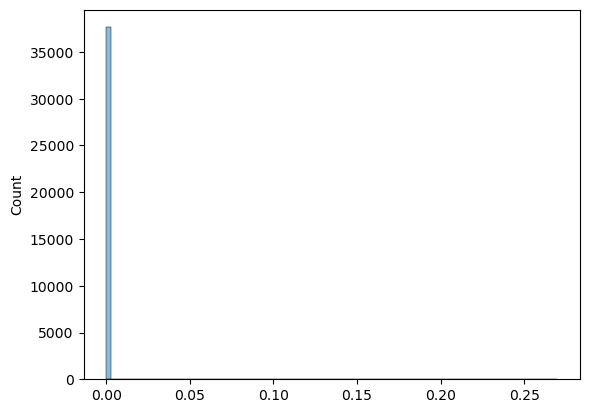

In [13]:
betweenness = nx.betweenness_centrality(G)
print(pd.DataFrame.from_dict(betweenness,orient="index",columns=["clustering"]).describe())
sns.histplot(betweenness.values(),bins=100,legend=False)

Centralidad closeness

         clustering
count  37700.000000
mean       0.313667
std        0.040806
min        0.141389
25%        0.284141
50%        0.311260
75%        0.346949
max        0.523081


<Axes: ylabel='Count'>

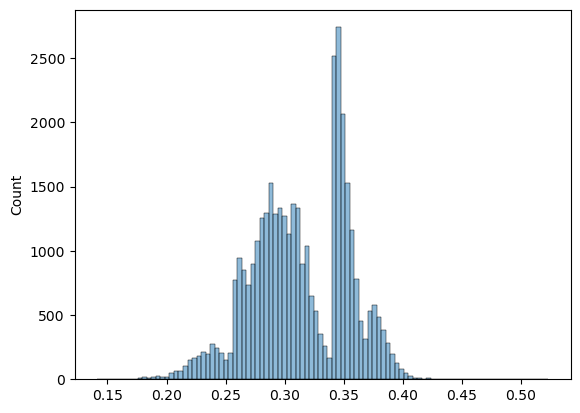

In [14]:
closeness = nx.closeness_centrality(G) # Reciproco de la distancia media de un nodo a todos los demás
print(pd.DataFrame.from_dict(closeness,orient="index",columns=["clustering"]).describe())
sns.histplot(closeness.values(),bins=100,legend=False)

Centralidad del autovalor

         clustering
count  3.770000e+04
mean   2.372860e-03
std    4.571137e-03
min    3.543991e-12
25%    1.671726e-04
50%    1.083887e-03
75%    3.186920e-03
max    3.559468e-01


<Axes: ylabel='Count'>

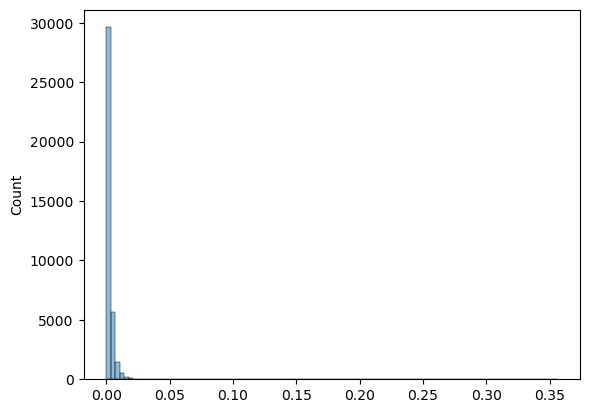

In [15]:
pagerank = nx.eigenvector_centrality(G)
print(pd.DataFrame.from_dict(pagerank,orient="index",columns=["clustering"]).describe())
sns.histplot(pagerank.values(),bins=100,legend=False)

Modularidad

## Aprendizaje automático relacional: 3 enfoques

### Aprendizaje automático relacional con extracción manual de características

In [25]:
X = np.transpose(pd.DataFrame([degrees.values(),clustering.values(), closeness.values(),
                   pagerank.values(), betweenness.values()]))
X.columns = ["degree", "clustering", "closeness", "pagerank", "betweenness"]
y = target["ml_target"]

print(X.head(5))
print(y.head(5))

     degree  clustering  closeness  pagerank   betweenness
0  0.000027    0.000000   0.275027  0.000047  0.000000e+00
1  0.000212    0.178571   0.294980  0.000952  1.149915e-06
2  0.000027    0.000000   0.261866  0.000036  0.000000e+00
3  0.000133    0.000000   0.278740  0.000105  5.317143e-05
4  0.000053    0.000000   0.243103  0.000009  6.135293e-09
0    0
1    0
2    1
3    0
4    1
Name: ml_target, dtype: int64


In [26]:
X.to_csv("X.csv")

Partición entrenamiento - test

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

#### DT

In [28]:
clf = tree.DecisionTreeClassifier(max_depth=3)
clf.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=3)

[Text(0.5, 0.875, 'x[3] <= 0.0\ngini = 0.384\nsamples = 25259\nvalue = [18724.0, 6535.0]'),
 Text(0.25, 0.625, 'x[2] <= 0.281\ngini = 0.481\nsamples = 9236\nvalue = [5520, 3716]'),
 Text(0.375, 0.75, 'True  '),
 Text(0.125, 0.375, 'x[4] <= 0.0\ngini = 0.496\nsamples = 5587\nvalue = [3049.0, 2538.0]'),
 Text(0.0625, 0.125, 'gini = 0.483\nsamples = 3849\nvalue = [2282, 1567]'),
 Text(0.1875, 0.125, 'gini = 0.493\nsamples = 1738\nvalue = [767, 971]'),
 Text(0.375, 0.375, 'x[4] <= 0.0\ngini = 0.437\nsamples = 3649\nvalue = [2471, 1178]'),
 Text(0.3125, 0.125, 'gini = 0.357\nsamples = 1937\nvalue = [1487, 450]'),
 Text(0.4375, 0.125, 'gini = 0.489\nsamples = 1712\nvalue = [984, 728]'),
 Text(0.75, 0.625, 'x[3] <= 0.004\ngini = 0.29\nsamples = 16023\nvalue = [13204, 2819]'),
 Text(0.625, 0.75, '  False'),
 Text(0.625, 0.375, 'x[2] <= 0.343\ngini = 0.342\nsamples = 10777\nvalue = [8419, 2358]'),
 Text(0.5625, 0.125, 'gini = 0.29\nsamples = 7410\nvalue = [6106, 1304]'),
 Text(0.6875, 0.125, 'g

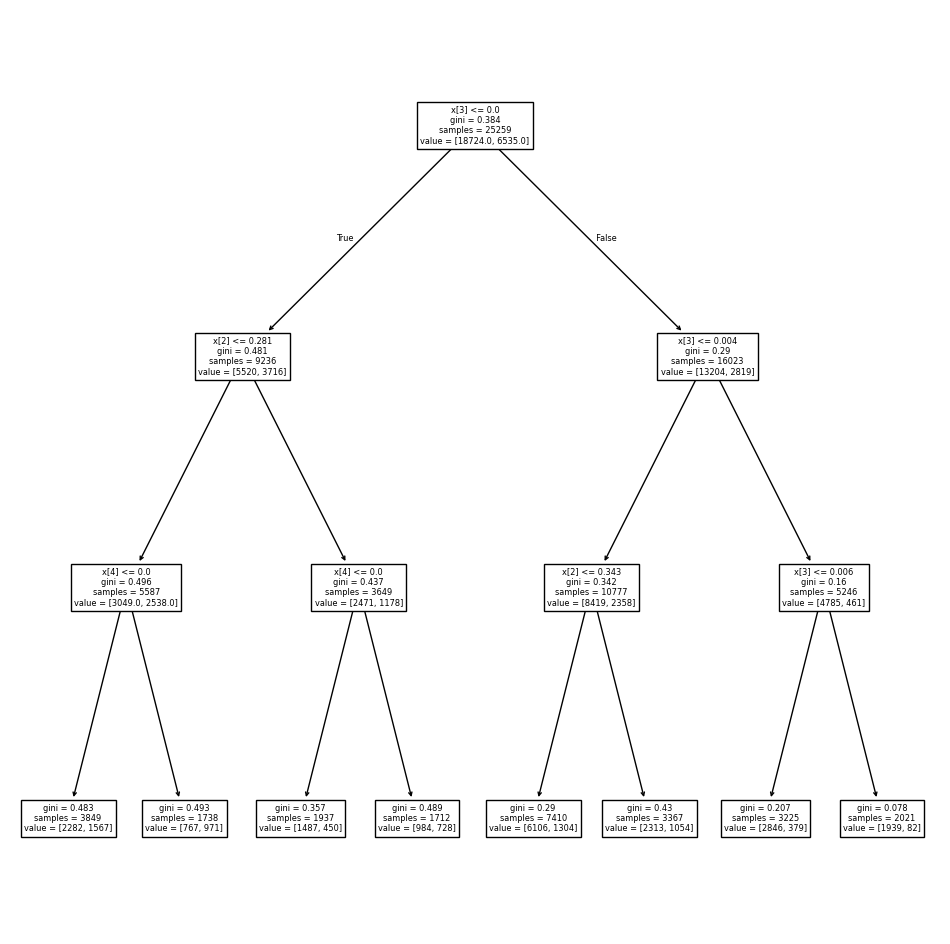

In [29]:
plt.figure(figsize=(12,12))
tree.plot_tree(clf)

Evaluación

In [35]:
from sklearn.metrics import accuracy_score, confusion_matrix


y_pred = clf.predict(X_test)

print(accuracy_score(y_true= y_test,y_pred=y_pred))

print(confusion_matrix(y_true= y_test,y_pred=y_pred))

0.7537979262117193
[[8888  349]
 [2714  490]]


### Aprendizaje automático con extracción automática de características (node2vect)

### Graph Neuronal Networks 